In [26]:
r={}

diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

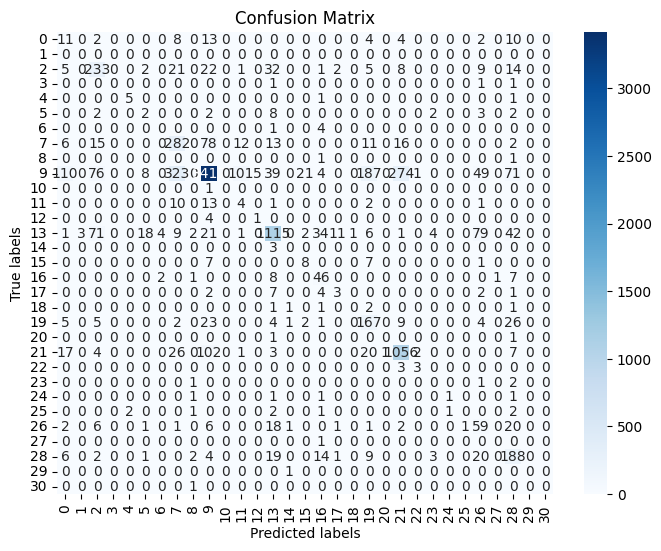

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

# data=data.head(1000)

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train_resampled, y_train_resampled)

y_pred = catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('CatBoostClassifier:')
print("Accuracy:", accuracy)
r['CBC']=accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [3]:
random_sample = data.sample(n=1508)  
X_test = random_sample
predictions = catboost_model.predict(X_test)
random_sample['Predicted'] = predictions
print(random_sample)

actual_labels = random_sample['diseaseSemanticType']
predicted_labels = random_sample['Predicted']
accuracy = accuracy_score(actual_labels, predicted_labels)
print("Accuracy for the 20 random samples: {:.2f}%".format(accuracy * 100))


       diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
4872        4872         7978            2          1106                   30   
4452        4452        17045            1            49                   23   
14414      14414        24219            0          1106                   11   
17379      17379        19137            0           284                   11   
9805        9805        25968            0           557                   11   
...          ...          ...          ...           ...                  ...   
15576      15576         3853            2          1106                   15   
24648      24648        12663            0          1106                   15   
8426        8426        13581            0             0                   11   
13563      13563        10826            0            49                   23   
14924      14924        25496            0            71                   23   

       NofGenes  NofPmids  

diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

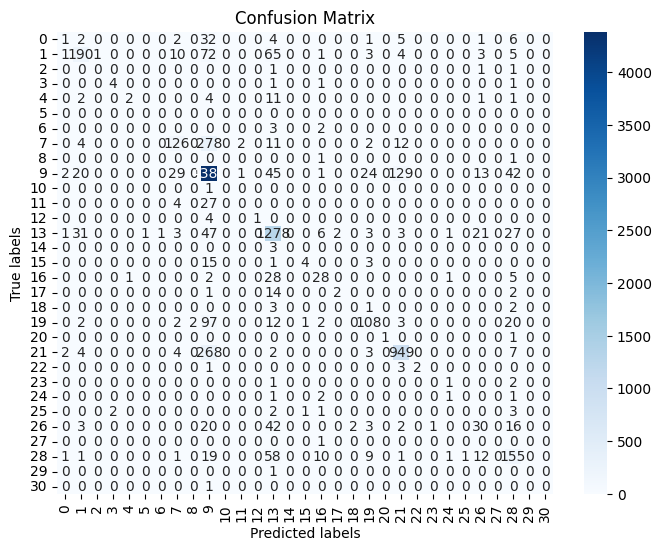

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

# data=data.head(1000)

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())


et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train_resampled, y_train_resampled)

y_pred = et_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('ExtraTreesClassifier:')
print("Accuracy:", accuracy)
r['ET']=accuracy

class_report = classification_report(y_test, y_pred,zero_division=1)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

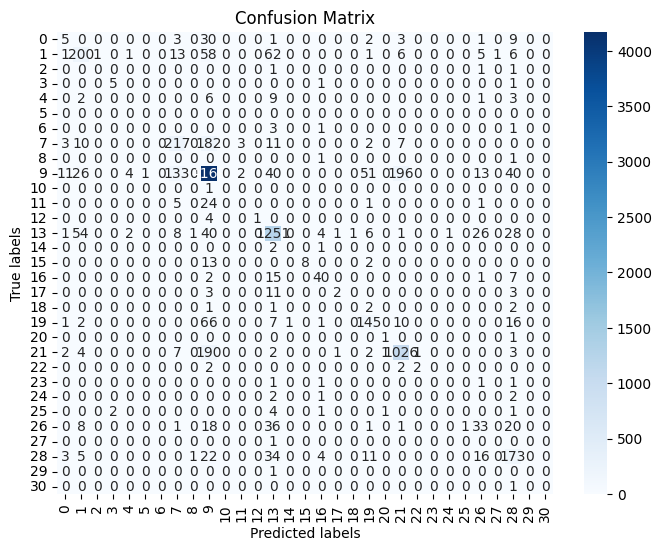

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

# data=data.head(1000)

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=None)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6, num_leaves=31, verbose=0, is_unbalance=True)

lgbm_model.fit(X_train_resampled, y_train_resampled)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('LGBMClassifier:')
print("Accuracy:", accuracy)
# r['LGBM']=accuracy

class_report = classification_report(y_test, y_pred, zero_division=1)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


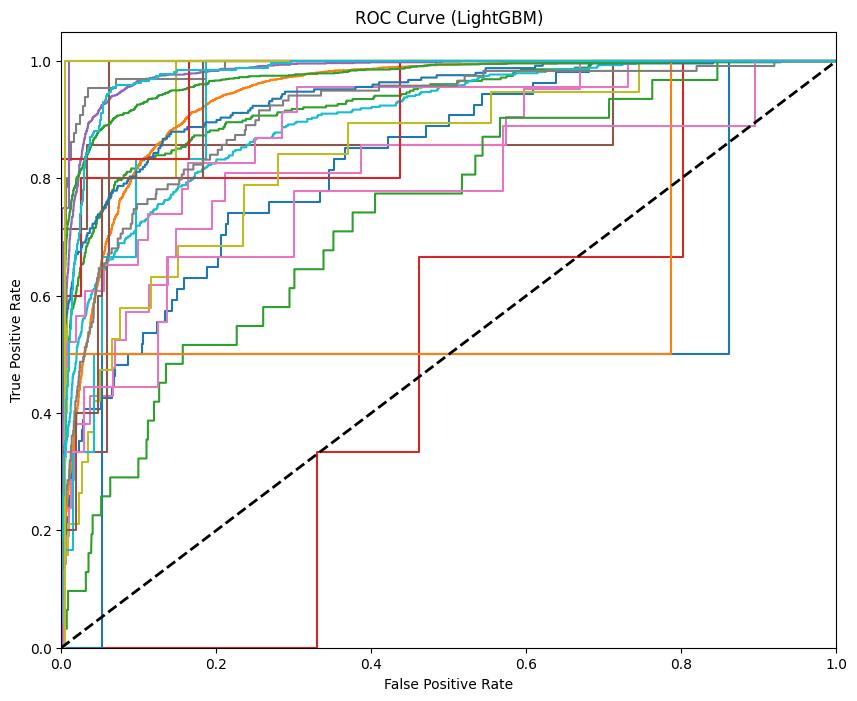

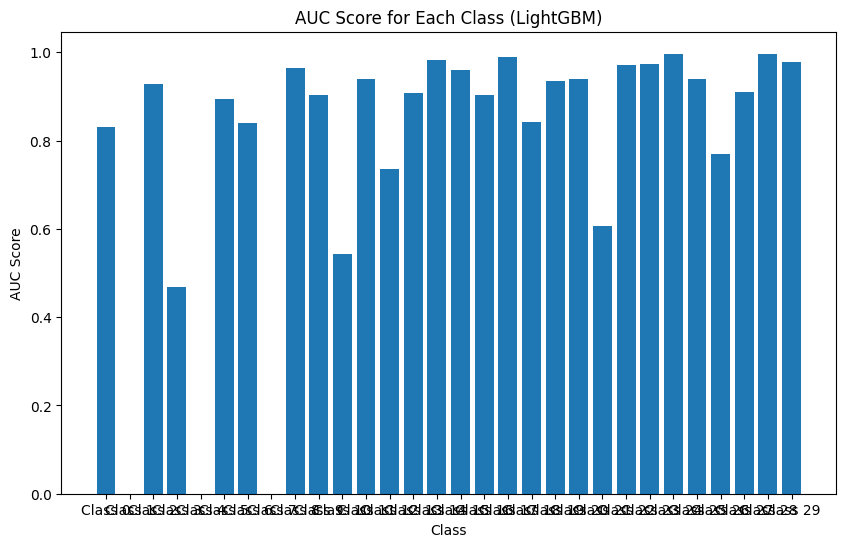

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.w

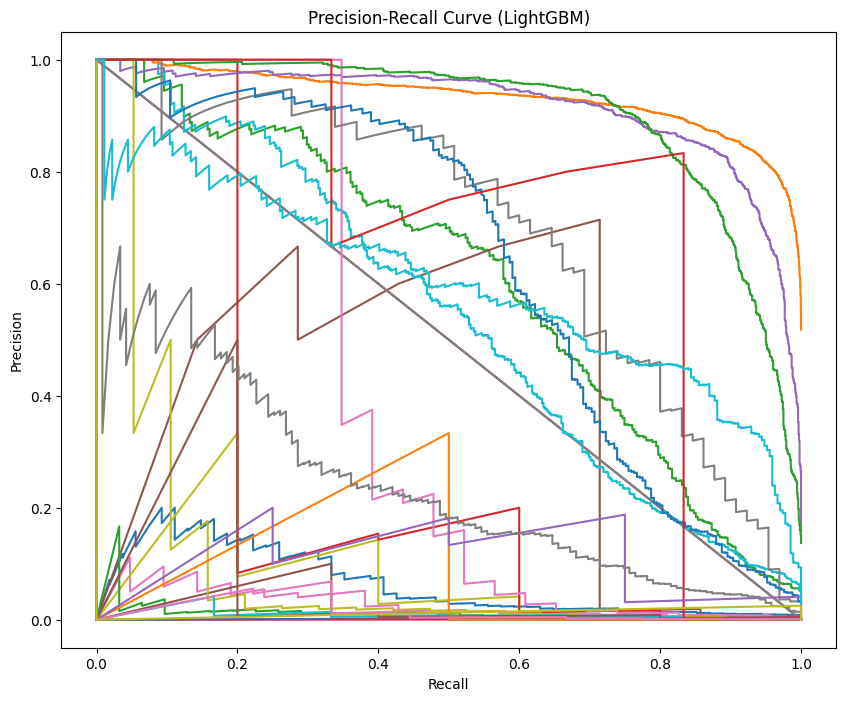

In [15]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Get the probability predictions for each class
y_probs_lgbm = lgbm_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_lgbm = dict()
tpr_lgbm = dict()
roc_auc_lgbm = dict()
for i in range(len(lgbm_model.classes_)):
    fpr_lgbm[i], tpr_lgbm[i], _ = roc_curve(y_test == lgbm_model.classes_[i], y_probs_lgbm[:, i])
    roc_auc_lgbm[i] = auc(fpr_lgbm[i], tpr_lgbm[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(lgbm_model.classes_)):
    plt.plot(fpr_lgbm[i], tpr_lgbm[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc_lgbm[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM)')
# plt.legend(loc="lower right")
plt.show()

# Plot AUC score for each class
plt.figure(figsize=(10, 6))
plt.bar(range(len(roc_auc_lgbm)), list(roc_auc_lgbm.values()), align='center')
plt.xticks(range(len(roc_auc_lgbm)), ['Class {}'.format(i) for i in range(len(roc_auc_lgbm))])
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.title('AUC Score for Each Class (LightGBM)')
plt.show()

# Compute precision-recall curve and average precision for each class
precision_lgbm = dict()
recall_lgbm = dict()
average_precision_lgbm = dict()
for i in range(len(lgbm_model.classes_)):
    precision_lgbm[i], recall_lgbm[i], _ = precision_recall_curve(y_test == lgbm_model.classes_[i], y_probs_lgbm[:, i])
    average_precision_lgbm[i] = average_precision_score(y_test == lgbm_model.classes_[i], y_probs_lgbm[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(lgbm_model.classes_)):
    plt.plot(recall_lgbm[i], precision_lgbm[i], label='Precision-recall curve (class {}) (AP = {:.2f})'.format(i, average_precision_lgbm[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
# plt.legend(loc="lower left")
plt.show()


diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

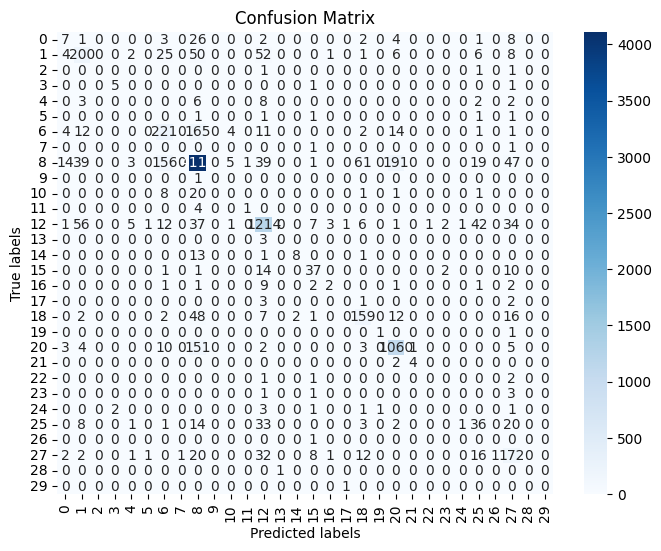

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)
print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
print(data.head())

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())

dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(set(y)),       # Number of classes
    'eval_metric': 'merror'         # Evaluation metric
}

num_rounds = 1000

xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred = xgb_model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print('XGBoost:')
print("Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)
print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
print(data.head())

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())

dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(set(y)),       # Number of classes
    'eval_metric': 'merror'         # Evaluation metric
}

num_rounds = 1000

# Add the validation dataset for evaluation during training
evals = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params, dtrain, num_rounds, evals=evals, early_stopping_rounds=10)

# Extract the evaluation results
eval_results = xgb_model.evals_result()

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(eval_results['train']['merror'], label='Training Error')
plt.plot(eval_results['eval']['merror'], label='Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Classification Error')
plt.title('Training and Validation Error Curves')
plt.legend()
plt.show()


diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

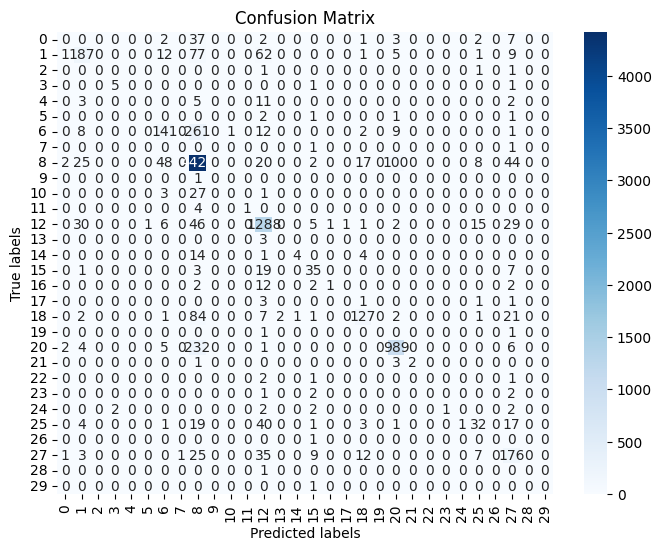

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

# data=data.head(1000)

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('RandomForestClassifier:')
print("Accuracy:", accuracy)
r['RF']=accuracy

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Fit the RandomForestClassifier with the training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Check if the RandomForestClassifier is fitted properly
if not hasattr(rf_model, 'estimators_') or len(rf_model.estimators_) == 0:
    print("RandomForestClassifier is not fitted with any trees.")
else:
    print("RandomForestClassifier is fitted with {} trees.".format(len(rf_model.estimators_)))

# Now, proceed to predict probabilities
y_probs_rf = rf_model.predict_proba(X_test)


RandomForestClassifier is fitted with 80 trees.


C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


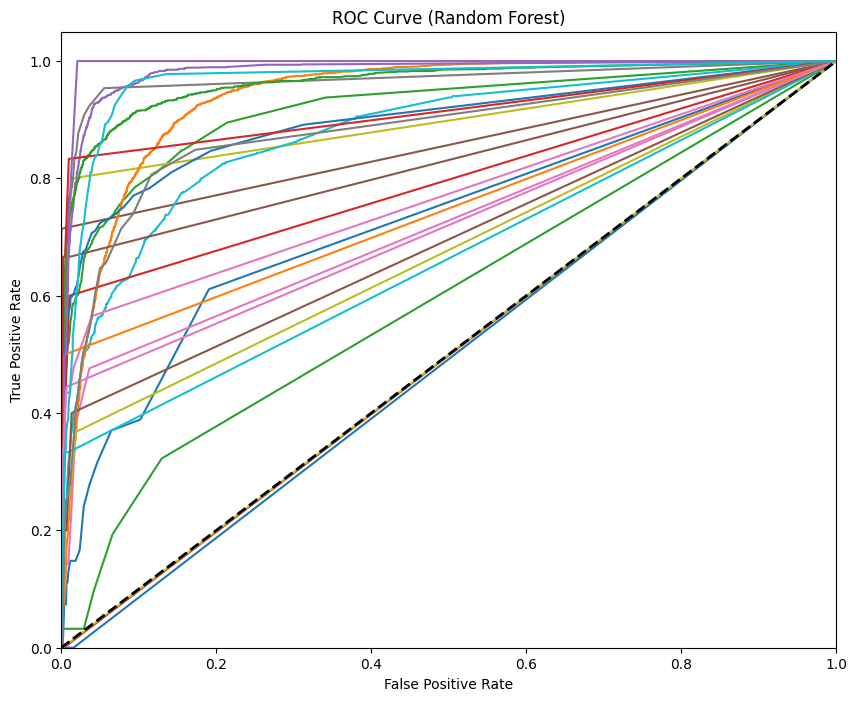

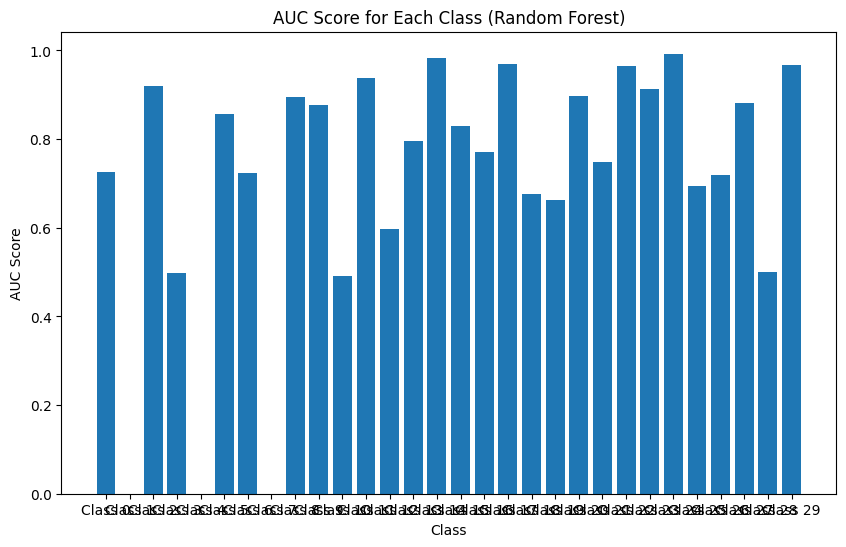

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.w

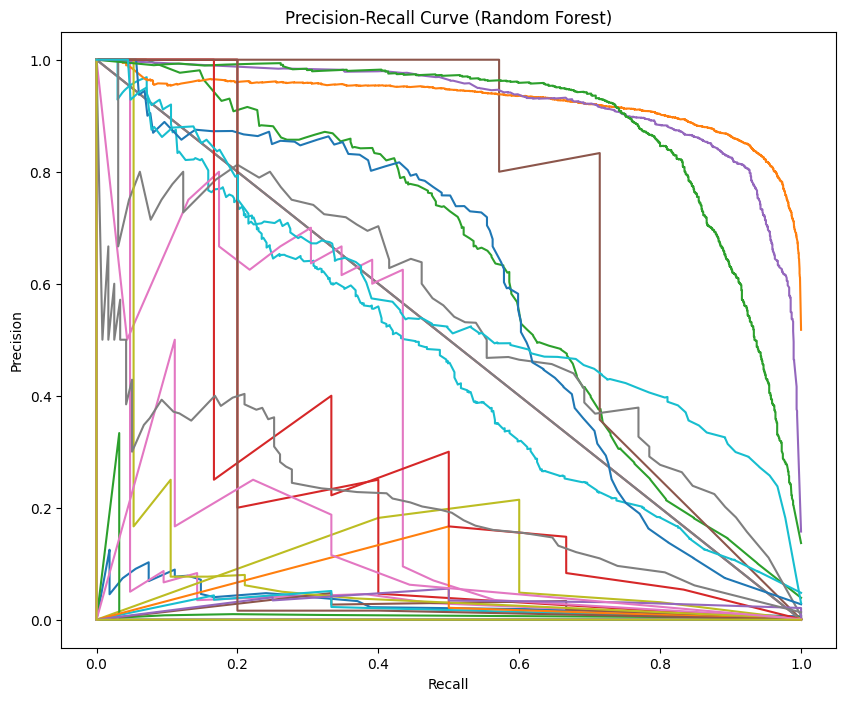

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Get the probability predictions for each class
y_probs_rf = rf_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(len(rf_model.classes_)):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test == rf_model.classes_[i], y_probs_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(rf_model.classes_)):
    plt.plot(fpr_rf[i], tpr_rf[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc_rf[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
# plt.legend(loc="lower right")
plt.show()

# Plot AUC score for each class
plt.figure(figsize=(10, 6))
plt.bar(range(len(roc_auc_rf)), list(roc_auc_rf.values()), align='center')
plt.xticks(range(len(roc_auc_rf)), ['Class {}'.format(i) for i in range(len(roc_auc_rf))])
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.title('AUC Score for Each Class (Random Forest)')
plt.show()

# Compute precision-recall curve and average precision for each class
precision_rf = dict()
recall_rf = dict()
average_precision_rf = dict()
for i in range(len(rf_model.classes_)):
    precision_rf[i], recall_rf[i], _ = precision_recall_curve(y_test == rf_model.classes_[i], y_probs_rf[:, i])
    average_precision_rf[i] = average_precision_score(y_test == rf_model.classes_[i], y_probs_rf[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(rf_model.classes_)):
    plt.plot(recall_rf[i], precision_rf[i], label='Precision-recall curve (class {}) (AP = {:.2f})'.format(i, average_precision_rf[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
# plt.legend(loc="lower left")
plt.show()


In [8]:
print(r)

{'CBC': 0.7293116782675947, 'ET': 0.802342282620705, 'LGBM': 0.8041100430891615, 'RF': 0.8184730968953706}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

# data=data.head(1000)

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())



et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6, num_leaves=31, verbose=0, is_unbalance=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.2, depth=6, verbose=0)
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(set(y)),       # Number of classes
    'eval_metric': 'merror'         # Evaluation metric
}

num_rounds = 1000

xgb_model = xgb.train(params, dtrain, num_rounds)
ensemble_clf = VotingClassifier(
    estimators=[
        ('CatBoost', catboost_model),
        ('LGBM', lgbm_model),
        ('Extra Trees', et_model),
        ('Random Forest', rf_model),
        ('XGBoost', xgb_model)
    ],
    voting='hard'
)

ensemble_clf.fit(X_train_resampled, y_train_resampled)
ensemble_pred = ensemble_clf.predict(X_test).ravel()  

print()
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Classifier Accuracy:", ensemble_accuracy)
r['EVC']=ensemble_accuracy
ensemble_class_report = classification_report(y_test, ensemble_pred)
print("Ensemble Classifier Classification Report:")
print(ensemble_class_report)

conf_mat = confusion_matrix(y_test, ensemble_pred)
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"fontsize":30})
ax.set_xlabel('Predicted labels', fontsize=25)
ax.set_ylabel('True labels', fontsize=25)
ax.set_title('confusion_mat_Voting_ensemble', fontsize=25)

plt.tight_layout()
plt.show()


diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

diseaseId                  0
diseaseName                0
diseaseType                0
diseaseClass           11523
diseaseSemanticType        0
NofGenes                   0
NofPmids                   0
dtype: int64
diseaseId              0
diseaseName            0
diseaseType            0
diseaseClass           0
diseaseSemanticType    0
NofGenes               0
NofPmids               0
dtype: int64
   diseaseId  diseaseName  diseaseType  diseaseClass  diseaseSemanticType  \
0          0          531            2           654                   30   
1          1          534            2           284                   30   
2          2          530            2           143                   15   
3          3          546            2           143                   15   
4          4          538            1            49                   23   

   NofGenes  NofPmids  
0         2         2  
1         1         1  
2       103         0  
3         2         0  
4        13  

C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karth\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

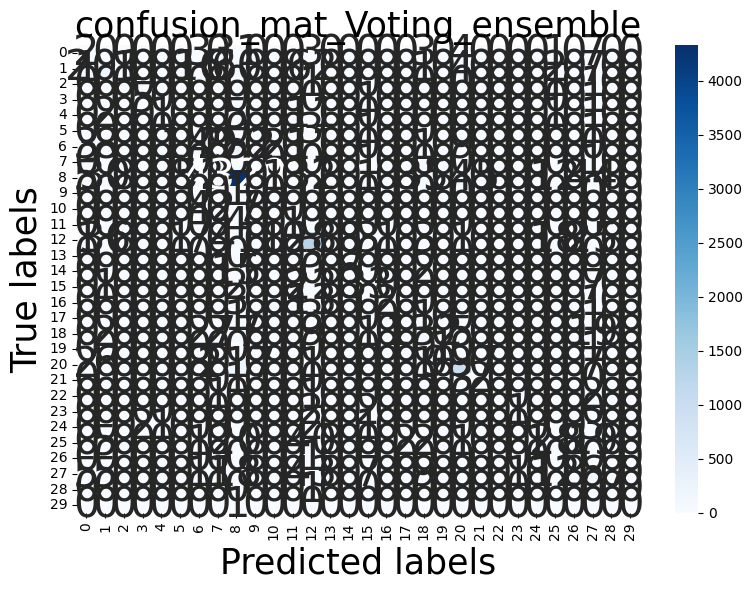

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

print(data.isnull().sum())

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

print(data.isnull().sum())

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

# data=data.head(1000)

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after over sampling:")
print(pd.Series(y_train_resampled).value_counts())

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6, num_leaves=31, verbose=0, is_unbalance=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.2, depth=6, verbose=0)
# xgb_model = XGBClassifier(max_depth=6, learning_rate=0.1, objective='multi:softmax', num_class=len(set(y)), n_estimators=1000)

ensemble_clf = VotingClassifier(
    estimators=[
#         ('CatBoost', catboost_model),
        ('LGBM', lgbm_model),
        ('Extra Trees', et_model),
        ('Random Forest', rf_model),
        # ('XGBoost', xgb_model)
    ],
    voting='hard'
)

ensemble_clf.fit(X_train_resampled, y_train_resampled)
ensemble_pred = ensemble_clf.predict(X_test).ravel()

print()
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Classifier Accuracy:", ensemble_accuracy)
ensemble_class_report = classification_report(y_test, ensemble_pred)
print("Ensemble Classifier Classification Report:")
print(ensemble_class_report)

conf_mat = confusion_matrix(y_test, ensemble_pred)
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax, annot_kws={"fontsize":30})
ax.set_xlabel('Predicted labels', fontsize=25)
ax.set_ylabel('True labels', fontsize=25)
ax.set_title('confusion_mat_Voting_ensemble', fontsize=25)

plt.tight_layout()
plt.show()


In [ ]:
print(r)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

path = r"C:\Users\karth\Downloads\disease_associations (1).xls"
data = pd.read_excel(path)

constant_value = 'Unknown'
data['diseaseClass'].fillna(constant_value, inplace=True)

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop('diseaseSemanticType', axis=1)
y = data['diseaseSemanticType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')  # 32 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_accuracy)

y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print('DNN Model:')
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
